In [9]:
import sncosmo
from scipy.interpolate import InterpolatedUnivariateSpline as Spline1d

In [5]:
d0 = sncosmo.read_lc('14aon.dat')

In [6]:
d = d0[((d0['band'] == 'P48R') | (d0['band'] == 'P60r')) & 
       (d0['flux'] > 0.) & (d0['flux'] < 230.)]# &
       #(d0['time'] < 56950)]

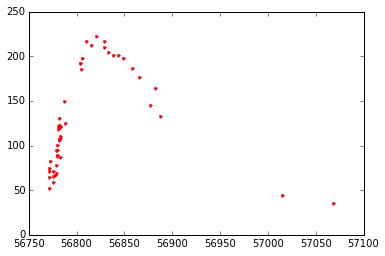

In [7]:
plt.plot(d['time'],d['flux'],'r.')

In [8]:
# Bin the points
dt = 2.
tb = []
fb = []

bins = np.arange(min(d['time']),max(d['time'])+dt,dt)
for t_min, t_max in zip(bins[:-1], bins[1:]):
    mask = (d['time'] >= t_min) & (d['time'] < t_max)
    if np.sum(mask) > 0:
        tb.append(np.mean(d['time'][mask]))
        fb.append(np.mean(d['flux'][mask]))

In [10]:
fs = Spline1d(tb,fb,k=1)

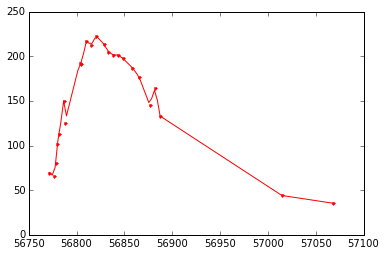

In [11]:
t0 = np.linspace(tb[0],tb[-1],101)
plt.plot(tb,fb,'r.')
plt.plot(t0,fs(t0),'r-')

In [15]:
ys = fs(t0)
sm_ker = np.exp(-np.linspace(-1,1,101)**2*80)
ysm = np.convolve(ys,sm_ker/np.sum(sm_ker))[50:151]

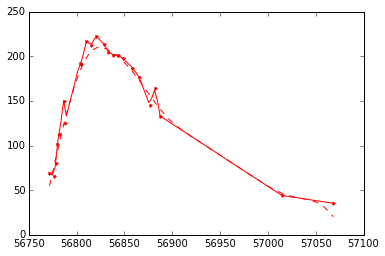

In [17]:
plt.plot(tb,fb,'r.')
plt.plot(t0,fs(t0),'r-')
plt.plot(t0,ysm,'r--')

In [23]:
t_max = t0[np.where(ysm == np.max(ysm))[0]]
fsm = ysm / np.max(ysm)
phases = t0 - t_max
print t_max

[ 56824.961164]


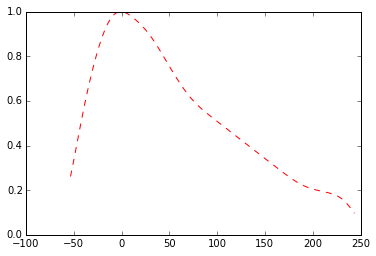

In [24]:
plt.plot(phases,fsm,'r--')

In [26]:
f = open('14aon_smoothed_lc.dat','w')
print >> f, '# phase flux'
for phase, flux in zip(phases, fsm):
    print >> f, phase, flux
f.close()